In [1]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import load_model, Model
from tensorflow import keras
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.spatial import distance
from pathlib import Path
import os
from tensorflow.keras.layers import Conv2D, Add, UpSampling2D,Layer,Input
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Dot,Activation
from tensorflow.keras.layers import Lambda
import cv2
from IPython.display import clear_output

from tensorflow.keras.layers import Layer, Conv2D, Reshape, Multiply, Concatenate
from tensorflow.keras.callbacks import TensorBoard


2024-11-11 13:46:36.015208: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-11 13:46:36.179718: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-11 13:46:36.240052: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-11 13:46:36.258808: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-11 13:46:36.379468: I tensorflow/core/platform/cpu_feature_guar

In [2]:
import glob

jpg_files = glob.glob(f"{os.getcwd()+"/SynthText/1"}/*.jpg")

print(jpg_files)


['/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_102_24.jpg', '/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_12_11.jpg', '/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_30_27.jpg', '/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_15_107.jpg', '/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_114_18.jpg', '/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_21_103.jpg', '/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_13_8.jpg', '/home/ali/Implementation-of-OCR-system-on-extracting-information

In [3]:
len(jpg_files)

4262

In [4]:
x_train = []
y_train = []
counter = -1
for image_path in jpg_files:
    counter += 1
    if counter == 500:
        break
    name = image_path
    try:
        image = cv2.imread(name)
        image = image /255
        tcl = cv2.imread(name[:-4]+"/tcl_map.jpg")
        tcl[tcl > 0] = 1
        # tco = cv2.imread(name[:-4]+"/tco_map.jpg")

        # tbo1 = cv2.imread(name[:-4]+"/tbo_map1.jpg")
        # tbo2 = cv2.imread(name[:-4]+"/tbo_map2.jpg")
        # tbo3 = cv2.imread(name[:-4]+"/tbo_map3.jpg")
        # tbo4 = cv2.imread(name[:-4]+"/tbo_map4.jpg")

        # tvo1 = cv2.imread(name[:-4]+"/tvo_map4.jpg")
        # tvo2 = cv2.imread(name[:-4]+"/tvo_map4.jpg")
        # tvo3 = cv2.imread(name[:-4]+"/tvo_map4.jpg")
        # tvo4 = cv2.imread(name[:-4]+"/tvo_map4.jpg")


        image_resized = cv2.resize(image, (512, 512), interpolation=cv2.INTER_LINEAR)

        tcl_map_resized = cv2.resize(tcl, (128, 128), interpolation=cv2.INTER_LINEAR)

        # tco_map_resized = cv2.resize(tco, (128, 128), interpolation=cv2.INTER_LINEAR)


        # tbo1_map_resized = cv2.resize(tbo1, (128, 128), interpolation=cv2.INTER_LINEAR)
        # tbo2_map_resized = cv2.resize(tbo2, (128, 128), interpolation=cv2.INTER_LINEAR)
        # tbo3_map_resized = cv2.resize(tbo3, (128, 128), interpolation=cv2.INTER_LINEAR)
        # tbo4_map_resized = cv2.resize(tbo4, (128, 128), interpolation=cv2.INTER_LINEAR)



        # tvo1_map_resized = cv2.resize(tvo1, (128, 128), interpolation=cv2.INTER_LINEAR)
        # tvo2_map_resized = cv2.resize(tvo2, (128, 128), interpolation=cv2.INTER_LINEAR)
        # tvo3_map_resized = cv2.resize(tvo3, (128, 128), interpolation=cv2.INTER_LINEAR)
        # tvo4_map_resized = cv2.resize(tvo4, (128, 128), interpolation=cv2.INTER_LINEAR)

        tcl_map_resized = tcl_map_resized[:, :, 0]
        # tco_map_resized = tco_map_resized[:, :, 0]

        # tbo1_map_resized = tbo1_map_resized[:, :, 0]
        # tbo2_map_resized = tbo2_map_resized[:, :, 0]
        # tbo3_map_resized = tbo3_map_resized[:, :, 0]
        # tbo4_map_resized = tbo4_map_resized[:, :, 0]

        # tvo1_map_resized = tvo1_map_resized[:, :, 0]
        # tvo2_map_resized = tvo2_map_resized[:, :, 0]
        # tvo3_map_resized = tvo3_map_resized[:, :, 0]
        # tvo4_map_resized = tvo4_map_resized[:, :, 0]
        

        tcl_map_resized = np.expand_dims(tcl_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
        # tco_map_resized = np.expand_dims(tco_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
        # tbo1_map_resized = np.expand_dims(tbo1_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
        # tbo2_map_resized = np.expand_dims(tbo2_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
        # tbo3_map_resized = np.expand_dims(tbo3_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
        # tbo4_map_resized = np.expand_dims(tbo4_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
        # tvo1_map_resized = np.expand_dims(tvo1_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
        # tvo2_map_resized = np.expand_dims(tvo2_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
        # tvo3_map_resized = np.expand_dims(tvo3_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
        # tvo4_map_resized = np.expand_dims(tvo4_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
        
        # y_sample = np.concatenate([tcl_map_resized, tco_map_resized, tbo1_map_resized,tbo2_map_resized,tbo3_map_resized,tbo4_map_resized, tvo1_map_resized,tvo2_map_resized,tvo3_map_resized,tvo4_map_resized], axis=-1)  # Shape (128, 128, 10)

        # print(y_sample.shape)
        # Append y_sample to y_train list or array
        y_train.append(tcl_map_resized)  # If using a list
        x_train.append(image_resized)  # If using a list
        
    
    except:
        # print("Image index: ",i," Not Appended")
        continue

y_train = np.stack(y_train)
x_train = np.stack(x_train)

print(y_train.shape)
print(x_train.shape)

[ WARN:0@4.285] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_12_11/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@4.307] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_13_8/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@4.332] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_127_4/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@4.413] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_10_42/tcl_map.jpg'): can't open/read file: check file path/integrity
[

(453, 128, 128, 1)
(453, 512, 512, 3)


In [4]:

resnet_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(512, 512, 3))


I0000 00:00:1731320202.858867 3575466 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1731320202.992083 3575466 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1731320202.992144 3575466 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1731320202.995372 3575466 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1731320202.995433 3575466 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [5]:
def Resnet50_updated(inputs):
    feature_extractor = Model(inputs=resnet_model.input, 
                              outputs=[resnet_model.get_layer('conv2_block3_out').output,
                                       resnet_model.get_layer('conv4_block6_out').output,
                                       resnet_model.get_layer('conv5_block3_out').output])

    # Get features for c2, c4, and c5 from the input image
    c2, c4, c5 = feature_extractor(inputs)

    # Upsample and project
    c4_upsampled = UpSampling2D(size=(4, 4), interpolation='bilinear')(c4)
    c5_upsampled = UpSampling2D(size=(8, 8), interpolation='bilinear')(c5)

    conv1 = Conv2D(128, (1, 1), padding='same')(c2)
    conv2 = Conv2D(128, (1, 1), padding='same')(c4_upsampled)
    conv3 = Conv2D(128, (1, 1), padding='same')(c5_upsampled)

    # c2_upsampled = UpSampling2D(size=(2, 2), interpolation='bilinear')(conv1)
    # c4_upsampled = UpSampling2D(size=(2, 2), interpolation='bilinear')(conv2)
    # c5_upsampled = UpSampling2D(size=(2, 2), interpolation='bilinear')(conv3)

    fused_feature_map = Add()([conv1, conv2, conv3])
    return fused_feature_map

        
        
    

In [29]:
def context_attention_block(fused_feature_map):
    print("INPUT SHAPE: ",fused_feature_map.shape)
    f_theta = tf.keras.layers.Conv2D(128,(1,1),padding='same')(fused_feature_map)
    f_phi = tf.keras.layers.Conv2D(128,(1,1),padding='same')(fused_feature_map)
    f_g= tf.keras.layers.Conv2D(128,(1,1),padding='same')(fused_feature_map)

    print("f_theta SHAPE: ",f_theta.shape)
    print("f_phi SHAPE: ",f_phi.shape)
    print("f_g SHAPE: ",f_g.shape)

    f_theta_reshaped = np.reshape(f_theta,(f_theta.shape[0]*f_theta.shape[1],f_theta.shape[2],f_theta.shape[3]))
    f_phi_reshaped = np.reshape(f_phi,(f_phi.shape[0]*f_phi.shape[1],f_phi.shape[2],f_phi.shape[3]))
    f_g_reshaped = np.reshape(f_g,(f_g.shape[0]*f_g.shape[1],f_g.shape[2],f_g.shape[3]))

    print("f_theta_reshaped SHAPE: ",f_theta_reshaped.shape)
    print("f_phi_reshaped SHAPE: ",f_phi_reshaped.shape)
    print("f_g_reshaped SHAPE: ",f_g_reshaped.shape)

    horizontlal_stage_1 = np.matmul(f_phi_reshaped,f_theta_reshaped.T)

    
    print("horizontlal_stage_1 SHAPE: ",horizontlal_stage_1.shape)

    activated_horizontlal_stage_1 = tf.keras.activations.sigmoid(horizontlal_stage_1)

    
    print("activated_horizontlal_stage_1 SHAPE: ",activated_horizontlal_stage_1.shape)

    reshaped_activated_horizontlal_stage_1 = np.reshape(activated_horizontlal_stage_1,(fused_feature_map.shape[0],fused_feature_map.shape[1],fused_feature_map.shape[2],fused_feature_map.shape[3]))

    
    print("reshaped_activated_horizontlal_stage_1 SHAPE: ",reshaped_activated_horizontlal_stage_1.shape)

    horizontal_finale = np.matmul(reshaped_activated_horizontlal_stage_1,f_g)

    
    print("horizontal_finale SHAPE: ",horizontal_finale.shape)
    
    f_theta_transposed = tf.keras.layers.Conv2D(128,(1,1),padding='same')(fused_feature_map)
    f_phi_transposed = tf.keras.layers.Conv2D(128,(1,1),padding='same')(fused_feature_map)
    f_g_transposed= tf.keras.layers.Conv2D(128,(1,1),padding='same')(fused_feature_map)

    
    f_theta_transposed = np.reshape(f_theta_transposed,(f_theta_transposed.shape[0]*f_theta_transposed.shape[2],f_theta_transposed.shape[1],f_theta_transposed.shape[3]))
    f_phi_transposed = np.reshape(f_phi_transposed,(f_phi_transposed.shape[0]*f_phi_transposed.shape[2],f_phi_transposed.shape[1],f_phi_transposed.shape[3]))
    f_g_transposed = np.reshape(f_g_transposed,(f_g_transposed.shape[0]*f_g_transposed.shape[2],f_g_transposed.shape[1],f_g_transposed.shape[3]))

    print("f_theta_transposed SHAPE: ",f_theta_transposed.shape)
    print("f_phi_transposed SHAPE: ",f_phi_transposed.shape)
    print("f_g_transposed SHAPE: ",f_g_transposed.shape)

    vertical_stage_1 = np.matmul(f_g_transposed.T,f_phi_transposed)

    
    print("vertical_stage_1 SHAPE: ",vertical_stage_1.shape)

    activated_vertical_stage_1 = tf.keras.activations.sigmoid(vertical_stage_1)

    
    print("activated_vertical_stage_1 SHAPE: ",activated_vertical_stage_1.shape)

    reshaped_activated_vertical_stage_1 = np.reshape(activated_vertical_stage_1,(fused_feature_map.shape[0],fused_feature_map.shape[1],fused_feature_map.shape[2],fused_feature_map.shape[3]))

    print("reshaped_activated_vertical_stage_1 SHAPE: ",reshaped_activated_vertical_stage_1.shape)

    vertical_finale = np.matmul(reshaped_activated_vertical_stage_1,f_theta_transposed)

    print("vertical_finale SHAPE: ",vertical_finale.shape)

    short_cut = tf.keras.layers.Conv2D(128,(1,1),padding='same')(fused_feature_map)

    
    print("short_cut SHAPE: ",short_cut.shape)
    
    cab_output = tf.keras.layers.Concatenate(axis=-1)([horizontal_finale,short_cut,vertical_finale])

    cab_output = Conv2D(128, (1, 1), padding="same")(cab_output)
    print("cab_output SHAPE2: ",cab_output.shape)
    return cab_output

In [30]:
import tensorflow as tf

def context_attention_block2(fused_feature_map):
    # Initial 1x1 Convolutions for theta, phi, and g transformations
    f_theta = tf.keras.layers.Conv2D(128, (1, 1), padding='same')(fused_feature_map)
    f_phi = tf.keras.layers.Conv2D(128, (1, 1), padding='same')(fused_feature_map)
    f_g = tf.keras.layers.Conv2D(128, (1, 1), padding='same')(fused_feature_map)

    # Reshape to (N * H * W, C) for f_theta and f_phi
    B, H, W, C = tf.shape(f_theta)[0], tf.shape(f_theta)[1], tf.shape(f_theta)[2], tf.shape(f_theta)[3]
    f_theta_reshaped = tf.reshape(f_theta, [B, H * W, C])  # Shape: (B, H*W, C)
    f_phi_reshaped = tf.reshape(f_phi, [B, H * W, C])      # Shape: (B, H*W, C)
    f_g_reshaped = tf.reshape(f_g, [B, H * W, C])          # Shape: (B, H*W, C)

    # Horizontal Attention (theta * phi^T)
    horizontlal_stage_1 = tf.matmul(f_phi_reshaped, f_theta_reshaped, transpose_b=True)  # Shape: (B, H*W, H*W)
    activated_horizontal = tf.keras.activations.sigmoid(horizontlal_stage_1)
    reshaped_horizontal = tf.reshape(activated_horizontal, [B, H, W, H * W])

    # Horizontal final attention output
    horizontal_finale = tf.matmul(reshaped_horizontal, f_g_reshaped)
    horizontal_finale = tf.reshape(horizontal_finale, [B, H, W, C])

    # Vertical Attention - analogous process with reshaping and multiplication
    f_theta_transposed = tf.keras.layers.Conv2D(128, (1, 1), padding='same')(fused_feature_map)
    f_phi_transposed = tf.keras.layers.Conv2D(128, (1, 1), padding='same')(fused_feature_map)
    f_g_transposed = tf.keras.layers.Conv2D(128, (1, 1), padding='same')(fused_feature_map)

    f_theta_transposed = tf.reshape(f_theta_transposed, [B, H, W, C])
    f_phi_transposed = tf.reshape(f_phi_transposed, [B, H, W, C])
    f_g_transposed = tf.reshape(f_g_transposed, [B, H, W, C])

    vertical_stage_1 = tf.matmul(f_g_transposed, f_phi_transposed, transpose_b=True)
    activated_vertical = tf.keras.activations.sigmoid(vertical_stage_1)
    reshaped_vertical = tf.reshape(activated_vertical, [B, H, W, C])

    vertical_finale = tf.matmul(reshaped_vertical, f_theta_transposed)
    vertical_finale = tf.reshape(vertical_finale, [B, H, W, C])

    # Shortcut connection
    shortcut = tf.keras.layers.Conv2D(128, (1, 1), padding='same')(fused_feature_map)

    # Concatenate the final outputs along the channel axis
    cab_output = tf.keras.layers.Concatenate()([horizontal_finale, shortcut, vertical_finale])
    cab_output = Conv2D(128, (1, 1), padding="same")(cab_output)

    return cab_output


In [31]:
class ContextAttentionBlock(Layer):
    def __init__(self):
        super(ContextAttentionBlock, self).__init__()
        self.conv_theta = Conv2D(128, (1, 1), padding='same')
        self.conv_phi = Conv2D(128, (1, 1), padding='same')
        self.conv_g = Conv2D(128, (1, 1), padding='same')
        self.conv_shortcut = Conv2D(128, (1, 1), padding='same')

    def call(self, inputs):
        fused_feature_map = inputs

        # Apply 1x1 Conv layers
        f_theta = self.conv_theta(fused_feature_map)
        f_phi = self.conv_phi(fused_feature_map)
        f_g = self.conv_g(fused_feature_map)

        # Reshape for attention calculation
        B, H, W, C = tf.shape(f_theta)[0], tf.shape(f_theta)[1], tf.shape(f_theta)[2], tf.shape(f_theta)[3]
        f_theta_reshaped = tf.reshape(f_theta, [B, H * W, C])
        f_phi_reshaped = tf.reshape(f_phi, [B, H * W, C])
        f_g_reshaped = tf.reshape(f_g, [B, H * W, C])

        # Calculate horizontal attention
        horizontal_attention = tf.keras.activations.sigmoid(tf.matmul(f_phi_reshaped, f_theta_reshaped, transpose_b=True))
        horizontal_attention = tf.reshape(horizontal_attention, [B, H, W, C])
        horizontal_result = Multiply()([horizontal_attention, fused_feature_map])

        # Calculate vertical attention
        vertical_attention = tf.keras.activations.sigmoid(tf.matmul(f_g_reshaped, f_phi_reshaped, transpose_a=True))
        vertical_attention = tf.reshape(vertical_attention, [B, H, W, C])
        vertical_result = Multiply()([vertical_attention, fused_feature_map])

        # Shortcut connection
        short_cut = self.conv_shortcut(fused_feature_map)

        # Concatenate results
        cab_output = Concatenate(axis=-1)([horizontal_result, short_cut, vertical_result])

        return cab_output

In [ ]:
from tensorflow.keras.layers import MultiHeadAttention, Conv2D, Multiply, Concatenate, Layer

class ContextAttentionBlock2(Layer):
    def __init__(self, num_heads=4, key_dim=128, **kwargs):
        super(ContextAttentionBlock2, self).__init__(**kwargs)
        self.num_heads = num_heads
        self.key_dim = key_dim
        self.horizontal_attention = MultiHeadAttention(num_heads=self.num_heads, key_dim=self.key_dim)
        self.vertical_attention = MultiHeadAttention(num_heads=self.num_heads, key_dim=self.key_dim)
        self.conv_theta = Conv2D(128, (1, 1), padding='same')
        self.conv_phi = Conv2D(128, (1, 1), padding='same')
        self.conv_g = Conv2D(128, (1, 1), padding='same')
        self.shortcut_conv = Conv2D(128, (1, 1), padding='same')
        self.conv_output = Conv2D(128, (1, 1), padding='same')
        
    def call(self, inputs):
        # Apply convolution layers for f_theta, f_phi, and g
        f_theta = self.conv_theta(inputs)
        f_phi = self.conv_phi(inputs)
        f_g = self.conv_g(inputs)
        
        # Apply attention in horizontal direction
        horizontal_attention_output = self.horizontal_attention(f_theta, f_phi, f_g)
        horizontal_result = Multiply()([horizontal_attention_output, inputs])

        # Apply attention in vertical direction
        vertical_attention_output = self.vertical_attention(f_theta, f_phi, f_g)
        vertical_result = Multiply()([vertical_attention_output, inputs])

        # Apply shortcut connection
        short_cut = self.shortcut_conv(inputs)

        # Concatenate results along the channel axis
        cab_output = Concatenate(axis=-1)([horizontal_result, short_cut, vertical_result])
        cab_output = self.conv_output(cab_output)
        
        return cab_output


In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Conv2D, Reshape, Multiply, Concatenate

class ContextAttentionBlock(Layer):
    def __init__(self):
        super(ContextAttentionBlock, self).__init__()
        # Define Conv2D layers but do not initialize with specific input shapes
        self.conv_theta = Conv2D(128, (1, 1), padding='same')
        self.conv_phi = Conv2D(128, (1, 1), padding='same')
        self.conv_g = Conv2D(128, (1, 1), padding='same')
        self.conv_shortcut = Conv2D(128, (1, 1), padding='same')
        self.conv_output = Conv2D(128, (1, 1), padding='same')

    def build(self, input_shape):
        # Initialize layers based on the input shape; Keras will call this automatically
        self.conv_theta.build(input_shape)
        self.conv_phi.build(input_shape)
        self.conv_g.build(input_shape)
        self.conv_shortcut.build(input_shape)
        # self.conv_output.build(input_shape)
        super(ContextAttentionBlock, self).build(input_shape)

    def call(self, inputs):
        fused_feature_map = inputs

        # Apply 1x1 Conv layers
        f_theta = self.conv_theta(fused_feature_map)
        f_phi = self.conv_phi(fused_feature_map)
        f_g = self.conv_g(fused_feature_map)

        # Reshape for attention calculation
        B, H, W, C = tf.shape(f_theta)[0], tf.shape(f_theta)[1], tf.shape(f_theta)[2], tf.shape(f_theta)[3]
        f_theta_reshaped = tf.reshape(f_theta, [B* H , W, C])
        f_phi_reshaped = tf.reshape(f_phi, [B* H , W, C])
        f_g_reshaped = tf.reshape(f_g, [B* H , W, C])

        # Calculate horizontal attention
        horizontal_attention = tf.keras.activations.sigmoid(tf.matmul(f_phi_reshaped, f_theta_reshaped, transpose_b=True))
        horizontal_attention = tf.reshape(horizontal_attention, [B, H, W, C])
        horizontal_result = Multiply()([horizontal_attention, fused_feature_map])

        # Calculate vertical attention
        # f_theta_reshaped = tf.reshape(f_theta, [B* W , H, C])
        # f_phi_reshaped = tf.reshape(f_phi, [B* W , H, C])
        # f_g_reshaped = tf.reshape(f_g, [B* W , H, C])

        vertical_attention = tf.keras.activations.sigmoid(tf.matmul(f_g_reshaped, f_phi_reshaped, transpose_a=True))
        vertical_attention = tf.reshape(vertical_attention, [B, H, W, C])
        vertical_result = Multiply()([vertical_attention, fused_feature_map])

        # Shortcut connection
        short_cut = self.conv_shortcut(fused_feature_map)

        # Adjust shapes before concatenation if needed
        if horizontal_result.shape[-1] != short_cut.shape[-1] or vertical_result.shape[-1] != short_cut.shape[-1]:
            raise ValueError("Incompatible shapes for concatenation in ContextAttentionBlock.")

        # Concatenate results
        cab_output = Concatenate()([horizontal_result, short_cut, vertical_result])
        cab_output = self.conv_output(cab_output)
        return cab_output

# Example usage in model
inputs = tf.keras.Input(shape=(512, 512, 3))
feature_map = Resnet50_updated(inputs)  # Assume this is your ResNet feature extractor

# Apply the custom CAB layer
cab_layer = ContextAttentionBlock()
attention_output = cab_layer(feature_map)
attention_output = cab_layer(attention_output)
x = Conv2D(256, (3, 3), padding='same', activation='relu')(attention_output)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(attention_output)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
output = Conv2D(1, (1, 1), activation='relu')(x)

model = tf.keras.Model(inputs=inputs, outputs=output)


In [7]:

from tensorflow.keras.optimizers import Adam

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    1e-5,
    decay_steps=1000,
    decay_rate=0.94)

model.compile(
    optimizer=Adam(learning_rate=lr_schedule), 
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
       metrics=["accuracy"]
)


In [87]:
from tensorflow.keras.layers import MultiHeadAttention, Conv2D, Multiply, Concatenate, Layer

class ContextAttentionBlock2(Layer):
    def __init__(self, num_heads=4, key_dim=128, **kwargs):
        super(ContextAttentionBlock2, self).__init__(**kwargs)
        self.num_heads = num_heads
        self.key_dim = key_dim
        self.horizontal_attention = MultiHeadAttention(num_heads=self.num_heads, key_dim=self.key_dim)
        self.vertical_attention = MultiHeadAttention(num_heads=self.num_heads, key_dim=self.key_dim)
        self.conv_theta = Conv2D(128, (1, 1), padding='same')
        self.conv_phi = Conv2D(128, (1, 1), padding='same')
        self.conv_g = Conv2D(128, (1, 1), padding='same')
        self.shortcut_conv = Conv2D(128, (1, 1), padding='same')
        self.conv_output = Conv2D(128, (1, 1), padding='same')
        
    def call(self, inputs):
        # Apply convolution layers for f_theta, f_phi, and g
        f_theta = self.conv_theta(inputs)
        f_phi = self.conv_phi(inputs)
        f_g = self.conv_g(inputs)
        
        # Apply attention in horizontal direction
        horizontal_attention_output = self.horizontal_attention(f_theta, f_phi, f_g)
        horizontal_result = Multiply()([horizontal_attention_output, inputs])

        # Apply attention in vertical direction
        vertical_attention_output = self.vertical_attention(f_theta, f_phi, f_g)
        vertical_result = Multiply()([vertical_attention_output, inputs])

        # Apply shortcut connection
        short_cut = self.shortcut_conv(inputs)

        # Concatenate results along the channel axis
        cab_output = Concatenate(axis=-1)([horizontal_result, short_cut, vertical_result])
        cab_output = self.conv_output(cab_output)
        
        return cab_output


In [9]:
accuracies = []
losses = []
x_train = []
y_train = []
tensorboard_callback = TensorBoard(log_dir="logs")
image_counter = 0 
for epochs in range(50):
    clear_output(wait=True)
    counter = -1
    for image_path in jpg_files:
        counter += 1
        if (counter > (image_counter+1) * 500) or counter == len(jpg_files)-1 :
            break
        name = image_path
        try:
            image = cv2.imread(name)
            image = image /255
            tcl = cv2.imread(name[:-4]+"/tcl_map.jpg")
            tcl[tcl > 0] = 1
            # tco = cv2.imread(name[:-4]+"/tco_map.jpg")

            # tbo1 = cv2.imread(name[:-4]+"/tbo_map1.jpg")
            # tbo2 = cv2.imread(name[:-4]+"/tbo_map2.jpg")
            # tbo3 = cv2.imread(name[:-4]+"/tbo_map3.jpg")
            # tbo4 = cv2.imread(name[:-4]+"/tbo_map4.jpg")

            # tvo1 = cv2.imread(name[:-4]+"/tvo_map4.jpg")
            # tvo2 = cv2.imread(name[:-4]+"/tvo_map4.jpg")
            # tvo3 = cv2.imread(name[:-4]+"/tvo_map4.jpg")
            # tvo4 = cv2.imread(name[:-4]+"/tvo_map4.jpg")


            image_resized = cv2.resize(image, (512, 512), interpolation=cv2.INTER_LINEAR)

            tcl_map_resized = cv2.resize(tcl, (128, 128), interpolation=cv2.INTER_LINEAR)

            # tco_map_resized = cv2.resize(tco, (128, 128), interpolation=cv2.INTER_LINEAR)


            # tbo1_map_resized = cv2.resize(tbo1, (128, 128), interpolation=cv2.INTER_LINEAR)
            # tbo2_map_resized = cv2.resize(tbo2, (128, 128), interpolation=cv2.INTER_LINEAR)
            # tbo3_map_resized = cv2.resize(tbo3, (128, 128), interpolation=cv2.INTER_LINEAR)
            # tbo4_map_resized = cv2.resize(tbo4, (128, 128), interpolation=cv2.INTER_LINEAR)



            # tvo1_map_resized = cv2.resize(tvo1, (128, 128), interpolation=cv2.INTER_LINEAR)
            # tvo2_map_resized = cv2.resize(tvo2, (128, 128), interpolation=cv2.INTER_LINEAR)
            # tvo3_map_resized = cv2.resize(tvo3, (128, 128), interpolation=cv2.INTER_LINEAR)
            # tvo4_map_resized = cv2.resize(tvo4, (128, 128), interpolation=cv2.INTER_LINEAR)

            tcl_map_resized = tcl_map_resized[:, :, 0]
            # tco_map_resized = tco_map_resized[:, :, 0]

            # tbo1_map_resized = tbo1_map_resized[:, :, 0]
            # tbo2_map_resized = tbo2_map_resized[:, :, 0]
            # tbo3_map_resized = tbo3_map_resized[:, :, 0]
            # tbo4_map_resized = tbo4_map_resized[:, :, 0]

            # tvo1_map_resized = tvo1_map_resized[:, :, 0]
            # tvo2_map_resized = tvo2_map_resized[:, :, 0]
            # tvo3_map_resized = tvo3_map_resized[:, :, 0]
            # tvo4_map_resized = tvo4_map_resized[:, :, 0]
            

            tcl_map_resized = np.expand_dims(tcl_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
            # tco_map_resized = np.expand_dims(tco_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
            # tbo1_map_resized = np.expand_dims(tbo1_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
            # tbo2_map_resized = np.expand_dims(tbo2_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
            # tbo3_map_resized = np.expand_dims(tbo3_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
            # tbo4_map_resized = np.expand_dims(tbo4_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
            # tvo1_map_resized = np.expand_dims(tvo1_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
            # tvo2_map_resized = np.expand_dims(tvo2_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
            # tvo3_map_resized = np.expand_dims(tvo3_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
            # tvo4_map_resized = np.expand_dims(tvo4_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
            
            # y_sample = np.concatenate([tcl_map_resized, tco_map_resized, tbo1_map_resized,tbo2_map_resized,tbo3_map_resized,tbo4_map_resized, tvo1_map_resized,tvo2_map_resized,tvo3_map_resized,tvo4_map_resized], axis=-1)  # Shape (128, 128, 10)

            # print(y_sample.shape)
            # Append y_sample to y_train list or array
            y_train.append(tcl_map_resized)  # If using a list
            x_train.append(image_resized)  # If using a list
            
        
        except:
            # print("Image index: ",i," Not Appended")
            continue

    y_train = np.stack(y_train)
    x_train = np.stack(x_train)

    history = model.fit(
    x=x_train,  # or a generator
    y=y_train,
    epochs=1,
    batch_size=16,
    callbacks=[tensorboard_callback]
    )
    del x_train
    del y_train
    x_train = []
    y_train = []
    accuracies.append(history.history["accuracy"][-1])
    losses.append(history.history["loss"][-1])

    image_counter+=1

[ WARN:0@304.226] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_12_11/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@304.245] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_13_8/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@304.266] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_127_4/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@304.338] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_10_42/tcl_map.jpg'): can't open/read file: check file path/int

: 

In [9]:
model.fit(
    x=x_train,  # or a generator
    y=y_train,
    epochs=50,
    batch_size=16,
)


Epoch 1/50


I0000 00:00:1731309928.260314 3536249 service.cc:146] XLA service 0x7fe93c002b70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731309928.260425 3536249 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-11-11 10:55:28.827071: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-11 10:55:31.147370: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-11-11 10:55:33.851798: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_16030', 16 bytes spill stores, 16 bytes spill loads

I0000 00:00:1731309956.882950 3536249 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


29/29 ━━━━━━━━━━━━━━━━━━━━ 70s 890ms/step - accuracy: 0.4269 - loss: 6.8660
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 210ms/step - accuracy: 0.8944 - loss: 1.0975
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 208ms/step - accuracy: 0.9374 - loss: 0.8135
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - accuracy: 0.9467 - loss: 0.7501
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 208ms/step - accuracy: 0.9473 - loss: 0.7665
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 210ms/step - accuracy: 0.9507 - loss: 0.7251
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 211ms/step - accuracy: 0.9483 - loss: 0.7734
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 208ms/step - accuracy: 0.9519 - loss: 0.7230
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - accuracy: 0.9518 - loss: 0.7319
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 205ms/step - accuracy: 0.9503 - loss: 0.7606
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 207ms/step - accuracy: 0.9510 - loss: 0.7524
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 204ms/step - accurac

In [ ]:
def new_cab(feature_fusion):
    print(feature_fusion.shape)

    f_theta = tf.keras.layers.Conv2D(128,(1,1),padding='same')(feature_fusion)
    f_phi = tf.keras.layers.Conv2D(128,(1,1),padding='same')(feature_fusion)
    f_g= tf.keras.layers.Conv2D(128,(1,1),padding='same')(feature_fusion)

    print("f_theta SHAPE: ",f_theta.shape)
    print("f_phi SHAPE: ",f_phi.shape)
    print("f_g SHAPE: ",f_g.shape)

    # Reshape for attention calculation
    B, H, W, C = tf.shape(f_theta)[0], tf.shape(f_theta)[1], tf.shape(f_theta)[2], tf.shape(f_theta)[3]

    
    print("b SHAPE: ",B)
    print("H SHAPE: ",H)
    print("W SHAPE: ",W)
    print("C SHAPE: ",C)
    
    f_theta_reshaped = tf.reshape(f_theta, [B* H , W, C])
    f_phi_reshaped = tf.reshape(f_phi, [B* H , W, C])
    f_g_reshaped = tf.reshape(f_g, [B* H , W, C])

    print("f_theta_reshaped SHAPE: ",f_theta_reshaped.shape)
    print("f_phi_reshaped SHAPE: ",f_phi_reshaped.shape)
    print("f_g_reshaped SHAPE: ",f_g_reshaped.shape)
    
    # Calculate horizontal attention

    horizontal_attention = tf.keras.activations.sigmoid(tf.matmul(f_phi_reshaped, f_theta_reshaped, transpose_b=True))
    horizontal_attention = tf.reshape(horizontal_attention, [B, H, W, C])
    horizontal_result = Multiply()([horizontal_attention, fused_feature_map])

    print("horizontal_attention SHAPE: ",horizontal_attention.shape)
    print("horizontal_result SHAPE: ",horizontal_result.shape)
    

    # Calculate vertical attention
    vertical_attention = tf.keras.activations.sigmoid(tf.matmul(f_g_reshaped, f_phi_reshaped, transpose_a=True))
    vertical_attention = tf.reshape(vertical_attention, [B, H, W, C])
    vertical_result = Multiply()([vertical_attention, fused_feature_map])

    print("vertical_attention SHAPE: ",vertical_attention.shape)
    print("vertical_result SHAPE: ",vertical_result.shape)

    # Shortcut connection
    short_cut = tf.keras.layers.Conv2D(128,(1,1),padding='same')(fused_feature_map)

    print("short_cut SHAPE: ",short_cut.shape)

    # Adjust shapes before concatenation if needed
    if horizontal_result.shape[-1] != short_cut.shape[-1] or vertical_result.shape[-1] != short_cut.shape[-1]:
        raise ValueError("Incompatible shapes for concatenation in ContextAttentionBlock.")

    # Concatenate results
    cab_output = Concatenate()([horizontal_result, short_cut, vertical_result])
    cab_output = tf.keras.layers.Conv2D(128,(1,1),padding='same')(cab_output)
    
    print("cab_output SHAPE: ",cab_output.shape)
    return cab_output

In [ ]:
image = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43.jpg")

tcl = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43/tcl_map.jpg")

tco = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43/tco_map.jpg")

tbo1 = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43/tbo_map1.jpg")
tbo2 = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43/tbo_map2.jpg")
tbo3 = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43/tbo_map3.jpg")
tbo4 = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43/tbo_map4.jpg")


tvo1 = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43/tvo_map4.jpg")
tvo2 = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43/tvo_map4.jpg")
tvo3 = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43/tvo_map4.jpg")
tvo4 = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43/tvo_map4.jpg")

In [ ]:
image_resized = cv2.resize(image, (512, 512), interpolation=cv2.INTER_LINEAR)

In [139]:
image_resized = np.expand_dims(image_resized, axis=0)

In [43]:
image_resized.shape

(512, 512, 3)

In [141]:
fused_feature_map = Resnet50_updated(image_resized)

In [142]:
fused_feature_map.shape

TensorShape([1, 128, 128, 128])

In [143]:
new_cab(fused_feature_map)

(1, 128, 128, 128)
f_theta SHAPE:  (1, 128, 128, 128)
f_phi SHAPE:  (1, 128, 128, 128)
f_g SHAPE:  (1, 128, 128, 128)
b SHAPE:  tf.Tensor(1, shape=(), dtype=int32)
H SHAPE:  tf.Tensor(128, shape=(), dtype=int32)
W SHAPE:  tf.Tensor(128, shape=(), dtype=int32)
C SHAPE:  tf.Tensor(128, shape=(), dtype=int32)
f_theta_reshaped SHAPE:  (128, 128, 128)
f_phi_reshaped SHAPE:  (128, 128, 128)
f_g_reshaped SHAPE:  (128, 128, 128)
horizontal_attention SHAPE:  (1, 128, 128, 128)
horizontal_result SHAPE:  (1, 128, 128, 128)
vertical_attention SHAPE:  (1, 128, 128, 128)
vertical_result SHAPE:  (1, 128, 128, 128)
short_cut SHAPE:  (1, 128, 128, 128)
cab_output SHAPE:  (1, 128, 128, 128)


<tf.Tensor: shape=(1, 128, 128, 128), dtype=float32, numpy=
array([[[[-1.5066466 , -0.11645188, -1.9368111 , ..., -4.2574286 ,
          -3.8909512 , -0.17260806],
         [-1.5259565 , -1.5919918 , -0.88626516, ..., -2.8019269 ,
          -1.8689106 ,  0.03293695],
         [-1.2142951 , -2.2489011 , -0.25216073, ..., -5.080569  ,
          -1.1395388 , -1.1854366 ],
         ...,
         [-2.187502  , -0.710015  ,  0.92423135, ..., -2.453734  ,
          -1.4710416 , -0.9861114 ],
         [-1.8995317 ,  3.801827  ,  0.37533146, ..., -0.37849262,
           0.75126106,  1.021363  ],
         [-1.8667588 ,  3.6894538 ,  1.140762  , ..., -1.4495841 ,
          -0.91427183,  0.7237336 ]],

        [[-3.3939452 , -0.17142123, -1.363567  , ..., -1.1153243 ,
           3.1085596 ,  1.5518005 ],
         [-2.2954679 ,  1.8452913 ,  1.1471219 , ..., -0.08458348,
          -2.585544  ,  0.59010476],
         [-0.7934174 ,  2.2563202 , -3.585759  , ...,  0.5879284 ,
          -0.28803957, -1

In [10]:
tcl.shape

(600, 568, 3)

In [11]:
len(tcl[tcl == 0])

989532

In [12]:
map = np.copy(tcl)
map[map>0] = 255

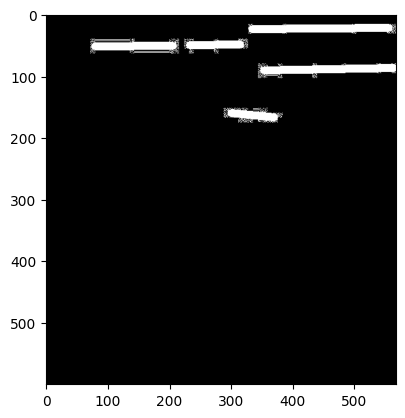

In [13]:
plt.imshow(map)

In [14]:
prediction = model.predict(np.expand_dims(image_resized,axis=0))

2024-11-11 11:03:58.839098: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1914', 8 bytes spill stores, 8 bytes spill loads



1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [15]:
prediction.shape

(1, 128, 128, 1)

In [16]:
pred_map = np.copy(prediction[0])
pred_map[pred_map>0] = 255

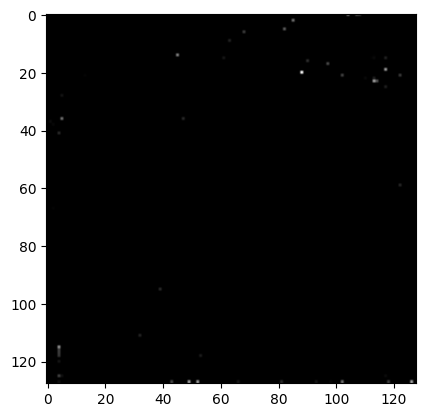

In [18]:
plt.imshow(prediction[0],cmap="gray")
plt.show()

In [103]:
np.where(prediction[0] != 0)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

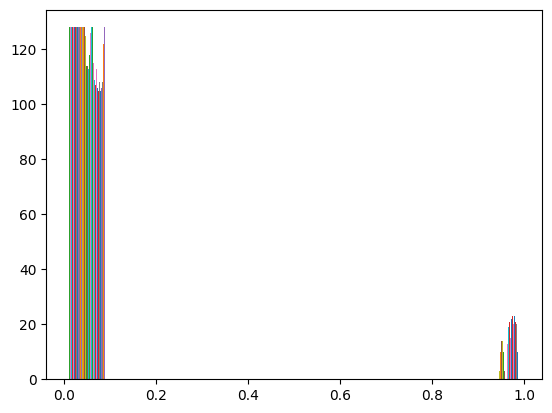

In [76]:
plt.hist(np.reshape(y_train[0],(128,128)))
plt.show()

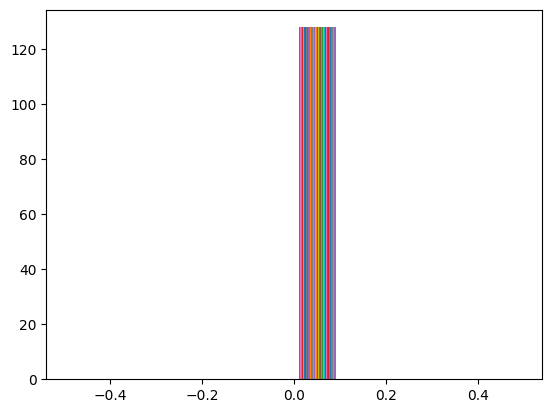

In [77]:
plt.hist(np.reshape(pred_map,(128,128)))
plt.show()

In [73]:
y_train[0].shape

(128, 128, 1)

In [79]:
pred_map.shape

(128, 128, 1)

In [81]:
np.max(np.reshape(pred_map,(128,128)))

0.0

In [85]:
a = y_train[0]
a = a.any(a>0 and a<1)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import load_model, Model
from tensorflow import keras
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.spatial import distance
from pathlib import Path
import os
from tensorflow.keras.layers import Conv2D, Add, UpSampling2D,Layer,Input
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Dot,Activation
from tensorflow.keras.layers import Lambda
import cv2

from tensorflow.keras.layers import Layer, Conv2D, Reshape, Multiply, Concatenate




import glob

jpg_files = glob.glob(f"{os.getcwd()+"/SynthText/1"}/*.jpg")
print(f"{os.getcwd()+"/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1"}/*.jpg")
print("IMAGE LENGTH : ",jpg_files)




resnet_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(512, 512, 3))


print("resnet_model LOADED")


def Resnet50_updated(inputs):
    feature_extractor = Model(inputs=resnet_model.input, 
                              outputs=[resnet_model.get_layer('conv2_block3_out').output,
                                       resnet_model.get_layer('conv4_block6_out').output,
                                       resnet_model.get_layer('conv5_block3_out').output])

    # Get features for c2, c4, and c5 from the input image
    c2, c4, c5 = feature_extractor(inputs)

    # Upsample and project
    c4_upsampled = UpSampling2D(size=(4, 4), interpolation='bilinear')(c4)
    c5_upsampled = UpSampling2D(size=(8, 8), interpolation='bilinear')(c5)

    conv1 = Conv2D(128, (1, 1), padding='same')(c2)
    conv2 = Conv2D(128, (1, 1), padding='same')(c4_upsampled)
    conv3 = Conv2D(128, (1, 1), padding='same')(c5_upsampled)

    # c2_upsampled = UpSampling2D(size=(2, 2), interpolation='bilinear')(conv1)
    # c4_upsampled = UpSampling2D(size=(2, 2), interpolation='bilinear')(conv2)
    # c5_upsampled = UpSampling2D(size=(2, 2), interpolation='bilinear')(conv3)

    fused_feature_map = Add()([conv1, conv2, conv3])
    return fused_feature_map

        
        
    

import tensorflow as tf
from tensorflow.keras.layers import Layer, Conv2D, Reshape, Multiply, Concatenate

class ContextAttentionBlock(Layer):
    def __init__(self):
        super(ContextAttentionBlock, self).__init__()
        # Define Conv2D layers but do not initialize with specific input shapes
        self.conv_theta = Conv2D(128, (1, 1), padding='same')
        self.conv_phi = Conv2D(128, (1, 1), padding='same')
        self.conv_g = Conv2D(128, (1, 1), padding='same')
        self.conv_shortcut = Conv2D(128, (1, 1), padding='same')
        self.conv_output = Conv2D(128, (1, 1), padding='same')

    def build(self, input_shape):
        # Initialize layers based on the input shape; Keras will call this automatically
        self.conv_theta.build(input_shape)
        self.conv_phi.build(input_shape)
        self.conv_g.build(input_shape)
        self.conv_shortcut.build(input_shape)
        # self.conv_output.build(input_shape)
        super(ContextAttentionBlock, self).build(input_shape)

    def call(self, inputs):
        fused_feature_map = inputs

        # Apply 1x1 Conv layers
        f_theta = self.conv_theta(fused_feature_map)
        f_phi = self.conv_phi(fused_feature_map)
        f_g = self.conv_g(fused_feature_map)

        # Reshape for attention calculation
        B, H, W, C = tf.shape(f_theta)[0], tf.shape(f_theta)[1], tf.shape(f_theta)[2], tf.shape(f_theta)[3]
        f_theta_reshaped = tf.reshape(f_theta, [B* H , W, C])
        f_phi_reshaped = tf.reshape(f_phi, [B* H , W, C])
        f_g_reshaped = tf.reshape(f_g, [B* H , W, C])

        # Calculate horizontal attention
        horizontal_attention = tf.keras.activations.sigmoid(tf.matmul(f_phi_reshaped, f_theta_reshaped, transpose_b=True))
        horizontal_attention = tf.reshape(horizontal_attention, [B, H, W, C])
        horizontal_result = Multiply()([horizontal_attention, fused_feature_map])

        # Calculate vertical attention
        # f_theta_reshaped = tf.reshape(f_theta, [B* W , H, C])
        # f_phi_reshaped = tf.reshape(f_phi, [B* W , H, C])
        # f_g_reshaped = tf.reshape(f_g, [B* W , H, C])

        vertical_attention = tf.keras.activations.sigmoid(tf.matmul(f_g_reshaped, f_phi_reshaped, transpose_a=True))
        vertical_attention = tf.reshape(vertical_attention, [B, H, W, C])
        vertical_result = Multiply()([vertical_attention, fused_feature_map])

        # Shortcut connection
        short_cut = self.conv_shortcut(fused_feature_map)

        # Adjust shapes before concatenation if needed
        if horizontal_result.shape[-1] != short_cut.shape[-1] or vertical_result.shape[-1] != short_cut.shape[-1]:
            raise ValueError("Incompatible shapes for concatenation in ContextAttentionBlock.")

        # Concatenate results
        cab_output = Concatenate()([horizontal_result, short_cut, vertical_result])
        cab_output = self.conv_output(cab_output)
        return cab_output

# Example usage in model
inputs = tf.keras.Input(shape=(512, 512, 3))
feature_map = Resnet50_updated(inputs)  # Assume this is your ResNet feature extractor

# Apply the custom CAB layer
cab_layer = ContextAttentionBlock()
attention_output = cab_layer(feature_map)
attention_output = cab_layer(attention_output)
x = Conv2D(256, (3, 3), padding='same', activation='relu')(attention_output)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(attention_output)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
output = Conv2D(1, (1, 1), activation='relu')(x)

model = tf.keras.Model(inputs=inputs, outputs=output)




from tensorflow.keras.optimizers import Adam

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    1e-5,
    decay_steps=1000,
    decay_rate=0.94)

model.compile(
    optimizer=Adam(learning_rate=lr_schedule), 
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
       metrics=["accuracy"]
)




x_train = []
y_train = []
for epochs in range(50):
    for image_counter in range(len(jpg_files)):
        x_train = []
        y_train = []
        counter = image_counter - 1
        counter += 1
        
        name = jpg_files[image_counter]
        try:
            image = cv2.imread(name)
            image = image /255
            tcl = cv2.imread(name[:-4]+"/tcl_map.jpg")
            tcl[tcl > 0] = 1
            # tco = cv2.imread(name[:-4]+"/tco_map.jpg")

            # tbo1 = cv2.imread(name[:-4]+"/tbo_map1.jpg")
            # tbo2 = cv2.imread(name[:-4]+"/tbo_map2.jpg")
            # tbo3 = cv2.imread(name[:-4]+"/tbo_map3.jpg")
            # tbo4 = cv2.imread(name[:-4]+"/tbo_map4.jpg")

            # tvo1 = cv2.imread(name[:-4]+"/tvo_map4.jpg")
            # tvo2 = cv2.imread(name[:-4]+"/tvo_map4.jpg")
            # tvo3 = cv2.imread(name[:-4]+"/tvo_map4.jpg")
            # tvo4 = cv2.imread(name[:-4]+"/tvo_map4.jpg")


            image_resized = cv2.resize(image, (512, 512), interpolation=cv2.INTER_LINEAR)

            tcl_map_resized = cv2.resize(tcl, (128, 128), interpolation=cv2.INTER_LINEAR)

            # tco_map_resized = cv2.resize(tco, (128, 128), interpolation=cv2.INTER_LINEAR)


            # tbo1_map_resized = cv2.resize(tbo1, (128, 128), interpolation=cv2.INTER_LINEAR)
            # tbo2_map_resized = cv2.resize(tbo2, (128, 128), interpolation=cv2.INTER_LINEAR)
            # tbo3_map_resized = cv2.resize(tbo3, (128, 128), interpolation=cv2.INTER_LINEAR)
            # tbo4_map_resized = cv2.resize(tbo4, (128, 128), interpolation=cv2.INTER_LINEAR)



            # tvo1_map_resized = cv2.resize(tvo1, (128, 128), interpolation=cv2.INTER_LINEAR)
            # tvo2_map_resized = cv2.resize(tvo2, (128, 128), interpolation=cv2.INTER_LINEAR)
            # tvo3_map_resized = cv2.resize(tvo3, (128, 128), interpolation=cv2.INTER_LINEAR)
            # tvo4_map_resized = cv2.resize(tvo4, (128, 128), interpolation=cv2.INTER_LINEAR)

            tcl_map_resized = tcl_map_resized[:, :, 0]
            # tco_map_resized = tco_map_resized[:, :, 0]

            # tbo1_map_resized = tbo1_map_resized[:, :, 0]
            # tbo2_map_resized = tbo2_map_resized[:, :, 0]
            # tbo3_map_resized = tbo3_map_resized[:, :, 0]
            # tbo4_map_resized = tbo4_map_resized[:, :, 0]

            # tvo1_map_resized = tvo1_map_resized[:, :, 0]
            # tvo2_map_resized = tvo2_map_resized[:, :, 0]
            # tvo3_map_resized = tvo3_map_resized[:, :, 0]
            # tvo4_map_resized = tvo4_map_resized[:, :, 0]
            

            tcl_map_resized = np.expand_dims(tcl_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
            # tco_map_resized = np.expand_dims(tco_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
            # tbo1_map_resized = np.expand_dims(tbo1_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
            # tbo2_map_resized = np.expand_dims(tbo2_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
            # tbo3_map_resized = np.expand_dims(tbo3_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
            # tbo4_map_resized = np.expand_dims(tbo4_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
            # tvo1_map_resized = np.expand_dims(tvo1_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
            # tvo2_map_resized = np.expand_dims(tvo2_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
            # tvo3_map_resized = np.expand_dims(tvo3_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
            # tvo4_map_resized = np.expand_dims(tvo4_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
            
            # y_sample = np.concatenate([tcl_map_resized, tco_map_resized, tbo1_map_resized,tbo2_map_resized,tbo3_map_resized,tbo4_map_resized, tvo1_map_resized,tvo2_map_resized,tvo3_map_resized,tvo4_map_resized], axis=-1)  # Shape (128, 128, 10)

            # print(y_sample.shape)
            # Append y_sample to y_train list or array
            y_train.append(tcl_map_resized)  # If using a list
            x_train.append(image_resized)  # If using a list
            
        
        except:
            # print("Image index: ",i," Not Appended")
            continue

        if image_counter % 200 == 0 :
            y_train = np.stack(y_train)
            x_train = np.stack(x_train)

            model.fit(
            x=x_train,  # or a generator
            y=y_train,
            epochs=1,
            batch_size=1,
            )

print("finished")


/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/*.jpg
IMAGE LENGTH :  ['/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_102_24.jpg', '/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_12_11.jpg', '/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_30_27.jpg', '/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_15_107.jpg', '/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_114_18.jpg', '/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText

[ WARN:0@54499.346] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_12_11/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54499.361] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_13_8/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54499.377] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_127_4/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54499.437] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_10_42/tcl_map.jpg'): can't open/read file: check file 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.3210 - loss: 7.0725


[ WARN:0@54500.297] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_106_35/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54500.468] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_135_9/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54500.523] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_13_25/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54500.528] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_1_75/tcl_map.jpg'): can't open/read file: check file

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2699 - loss: 8.5065


[ WARN:0@54500.809] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_31_97/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54500.834] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_129_81/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54500.851] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_131_74/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54500.859] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_107_20/tcl_map.jpg'): can't open/read file: check f

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.3037 - loss: 7.7288


[ WARN:0@54501.606] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_127_54/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54501.614] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_106_95/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54501.634] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_17_35/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54501.643] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_114_39/tcl_map.jpg'): can't open/read file: check f

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.3278 - loss: 7.2428


[ WARN:0@54502.282] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_114_82/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54502.283] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_133_44/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54502.305] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_133_64/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54502.306] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_106_65/tcl_map.jpg'): can't open/read file: check 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.3551 - loss: 7.0151


[ WARN:0@54502.882] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_33_83/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54502.896] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_10_70/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54502.902] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_131_7/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54502.937] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_27_55/tcl_map.jpg'): can't open/read file: check file

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.3824 - loss: 6.5148


[ WARN:0@54504.047] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_111_9/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54504.054] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_100_14/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54504.062] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_2_59/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54504.074] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_131_21/tcl_map.jpg'): can't open/read file: check fil

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.3712 - loss: 6.6346


[ WARN:0@54504.889] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_107_91/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54504.940] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_126_26/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54504.942] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_100_34/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54505.006] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_107_82/tcl_map.jpg'): can't open/read file: check 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4612 - loss: 5.2914


[ WARN:0@54505.300] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_15_1/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54505.481] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_135_102/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54505.483] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_13_27/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54505.495] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_13_40/tcl_map.jpg'): can't open/read file: check fil

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4835 - loss: 5.0482


[ WARN:0@54505.947] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_131_19/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54506.057] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_114_61/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54506.061] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_114_57/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54506.101] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_122_48/tcl_map.jpg'): can't open/read file: check 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4546 - loss: 5.3754


[ WARN:0@54506.490] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_131_92/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54506.528] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_15_94/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54506.538] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_114_53/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54506.734] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_111_106/tcl_map.jpg'): can't open/read file: check 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.6765 - loss: 2.8907


[ WARN:0@54507.268] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_21_88/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54507.284] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_115_1/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54507.339] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_13_36/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54507.356] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_131_59/tcl_map.jpg'): can't open/read file: check fil

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.4677 - loss: 5.2061


[ WARN:0@54507.711] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_28_5/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54507.917] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_133_49/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54507.951] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_1_0/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54507.952] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_124_75/tcl_map.jpg'): can't open/read file: check file 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.4882 - loss: 5.0167


[ WARN:0@54508.527] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_133_63/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54508.546] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_13_48/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54508.589] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_21_87/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54508.630] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_17_7/tcl_map.jpg'): can't open/read file: check file

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.4947 - loss: 4.8827


[ WARN:0@54508.967] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_140_15/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54508.973] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_115_4/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54509.152] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_140_31/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54509.159] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_147_6/tcl_map.jpg'): can't open/read file: check fi

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.5552 - loss: 3.9454


[ WARN:0@54509.787] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_131_51/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54509.850] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_107_71/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54509.854] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_13_105/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54509.906] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_107_27/tcl_map.jpg'): can't open/read file: check 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.5529 - loss: 4.0208


[ WARN:0@54510.932] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_140_23/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54510.933] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_133_79/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54510.946] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_33_56/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54510.963] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_131_76/tcl_map.jpg'): can't open/read file: check f

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.5809 - loss: 3.8354


[ WARN:0@54511.714] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_3_77/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54511.879] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_25_95/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54511.899] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_107_30/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54511.922] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_135_47/tcl_map.jpg'): can't open/read file: check fil

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.5574 - loss: 3.9689


[ WARN:0@54512.357] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_127_94/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54512.402] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_107_63/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54512.403] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_28_103/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54512.433] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_10_97/tcl_map.jpg'): can't open/read file: check f

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.5873 - loss: 3.5715


[ WARN:0@54512.712] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_12_11/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54512.722] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_13_8/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54512.736] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_127_4/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54512.782] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_10_42/tcl_map.jpg'): can't open/read file: check file 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6818 - loss: 2.9911


[ WARN:0@54513.596] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_106_35/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54513.749] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_135_9/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54513.800] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_13_25/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54513.804] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_1_75/tcl_map.jpg'): can't open/read file: check file

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6193 - loss: 3.3950


[ WARN:0@54514.091] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_31_97/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54514.116] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_129_81/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54514.133] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_131_74/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54514.141] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_107_20/tcl_map.jpg'): can't open/read file: check f

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6513 - loss: 2.8610


[ WARN:0@54514.873] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_127_54/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54514.880] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_106_95/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54514.901] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_17_35/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54514.912] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_114_39/tcl_map.jpg'): can't open/read file: check f

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6523 - loss: 2.8709


[ WARN:0@54515.484] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_114_82/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54515.486] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_133_44/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54515.507] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_133_64/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54515.509] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_106_65/tcl_map.jpg'): can't open/read file: check 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.6566 - loss: 3.1134


[ WARN:0@54516.051] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_33_83/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54516.065] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_10_70/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54516.069] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_131_7/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54516.102] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_27_55/tcl_map.jpg'): can't open/read file: check file

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6774 - loss: 2.7093


[ WARN:0@54516.924] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_122_73/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54516.937] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_135_46/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54516.946] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_15_81/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54516.950] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_127_91/tcl_map.jpg'): can't open/read file: check f

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.6968 - loss: 2.5030


[ WARN:0@54517.818] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_107_91/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54517.861] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_126_26/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54517.863] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_100_34/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54517.921] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_107_82/tcl_map.jpg'): can't open/read file: check 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.7112 - loss: 2.7002


[ WARN:0@54518.497] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_135_102/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54518.499] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_13_27/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54518.510] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_13_40/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54518.516] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_13_71/tcl_map.jpg'): can't open/read file: check fi

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.7455 - loss: 2.1943


[ WARN:0@54519.133] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_114_61/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54519.138] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_114_57/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54519.180] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_122_48/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54519.186] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_100_100/tcl_map.jpg'): can't open/read file: check

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.7526 - loss: 1.9905


[ WARN:0@54519.892] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_111_106/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54519.938] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_133_67/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54520.021] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_30_57/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54520.045] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_127_59/tcl_map.jpg'): can't open/read file: check 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.8521 - loss: 1.4336


[ WARN:0@54520.576] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_21_88/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54520.588] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_115_1/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54520.638] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_13_36/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54520.653] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_131_59/tcl_map.jpg'): can't open/read file: check fil

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7482 - loss: 2.1081


[ WARN:0@54521.141] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_133_49/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54521.171] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_1_0/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54521.172] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_124_75/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54521.250] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_28_45/tcl_map.jpg'): can't open/read file: check file

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7343 - loss: 2.2492


[ WARN:0@54521.685] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_133_63/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54521.702] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_13_48/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54521.735] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_21_87/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54521.772] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_17_7/tcl_map.jpg'): can't open/read file: check file

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7531 - loss: 2.0372


[ WARN:0@54522.220] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_140_31/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54522.227] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_147_6/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54522.232] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_140_45/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54522.241] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_28_73/tcl_map.jpg'): can't open/read file: check fi

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.7829 - loss: 1.7743


[ WARN:0@54522.822] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_131_51/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54522.885] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_107_71/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54522.889] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_13_105/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54522.938] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_107_27/tcl_map.jpg'): can't open/read file: check 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.7928 - loss: 1.6223


[ WARN:0@54523.836] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_140_23/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54523.837] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_133_79/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54523.849] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_33_56/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54523.864] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_131_76/tcl_map.jpg'): can't open/read file: check f

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.8043 - loss: 1.5334


[ WARN:0@54524.521] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_3_77/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54524.672] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_25_95/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54524.689] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_107_30/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54524.711] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_135_47/tcl_map.jpg'): can't open/read file: check fil

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.7574 - loss: 1.9752


[ WARN:0@54525.094] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_127_94/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54525.135] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_107_63/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54525.136] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_28_103/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54525.161] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_10_97/tcl_map.jpg'): can't open/read file: check f

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.7878 - loss: 1.6439


[ WARN:0@54525.324] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_12_11/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54525.336] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_13_8/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54525.348] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_127_4/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54525.394] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_10_42/tcl_map.jpg'): can't open/read file: check file 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.8386 - loss: 1.4606


[ WARN:0@54526.228] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_106_35/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54526.478] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_135_9/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54526.531] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_13_25/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54526.534] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_1_75/tcl_map.jpg'): can't open/read file: check file

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.8022 - loss: 1.5659


[ WARN:0@54527.093] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_122_100/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54527.097] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_131_28/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54527.125] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_122_5/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54527.177] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_133_1/tcl_map.jpg'): can't open/read file: check f

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.8242 - loss: 1.3415


[ WARN:0@54527.902] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_127_54/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54527.912] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_106_95/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54527.933] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_17_35/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54527.943] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_114_39/tcl_map.jpg'): can't open/read file: check f

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.8019 - loss: 1.6471


[ WARN:0@54528.695] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_114_82/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54528.696] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_133_44/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54528.718] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_133_64/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54528.720] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_106_65/tcl_map.jpg'): can't open/read file: check 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7846 - loss: 1.9744


[ WARN:0@54529.107] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_33_29/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54529.109] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_127_68/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54529.114] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_131_17/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54529.226] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_33_83/tcl_map.jpg'): can't open/read file: check fi

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8037 - loss: 1.6431


[ WARN:0@54530.192] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_111_9/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54530.200] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_100_14/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54530.208] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_2_59/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54530.222] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_131_21/tcl_map.jpg'): can't open/read file: check fil

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.8279 - loss: 1.3473


[ WARN:0@54530.611] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_25_21/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54530.629] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_122_33/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54530.637] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_131_40/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54530.644] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_28_74/tcl_map.jpg'): can't open/read file: check fi

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.8054 - loss: 1.9178


[ WARN:0@54531.488] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_135_102/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54531.490] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_13_27/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54531.504] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_13_40/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54531.510] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_13_71/tcl_map.jpg'): can't open/read file: check fi

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.8379 - loss: 1.5101


[ WARN:0@54532.077] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_114_61/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54532.081] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_114_57/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54532.121] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_122_48/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54532.126] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_100_100/tcl_map.jpg'): can't open/read file: check

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.8627 - loss: 1.0859


[ WARN:0@54532.852] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_111_106/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54532.895] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_133_67/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54532.977] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_30_57/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54533.000] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_127_59/tcl_map.jpg'): can't open/read file: check 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9009 - loss: 1.0100


[ WARN:0@54533.320] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_21_88/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54533.333] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_115_1/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54533.386] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_13_36/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54533.407] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_131_59/tcl_map.jpg'): can't open/read file: check fil

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8476 - loss: 1.2395


[ WARN:0@54533.872] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_133_49/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54533.900] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_1_0/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54533.901] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_124_75/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54533.975] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_28_45/tcl_map.jpg'): can't open/read file: check file

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8209 - loss: 1.5258


[ WARN:0@54534.386] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_133_63/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54534.403] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_13_48/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54534.436] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_21_87/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54534.476] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_17_7/tcl_map.jpg'): can't open/read file: check file

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.8423 - loss: 1.3008


[ WARN:0@54534.932] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_140_31/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54534.938] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_147_6/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54534.944] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_140_45/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54534.952] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_28_73/tcl_map.jpg'): can't open/read file: check fi

In [13]:
image_resized.shape

(512, 512, 3)

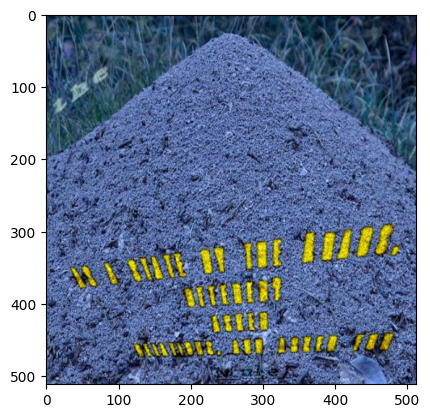

In [14]:
plt.imshow(image_resized)

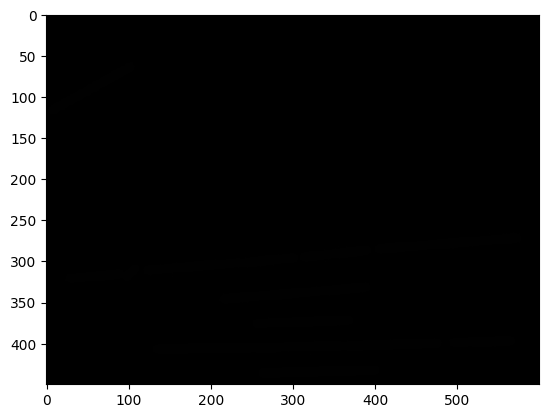

In [21]:
plt.imshow(tcl,cmap="gray")

In [16]:
prediction = model.predict(np.expand_dims(image_resized,axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [25]:
pred_map = prediction[0]
gr = tcl
gr[gr>0] = 255

In [26]:
pred_map[pred_map> 0] = 255

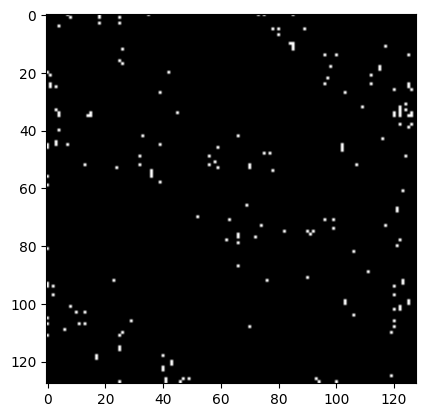

In [27]:
plt.imshow(pred_map,cmap="gray")

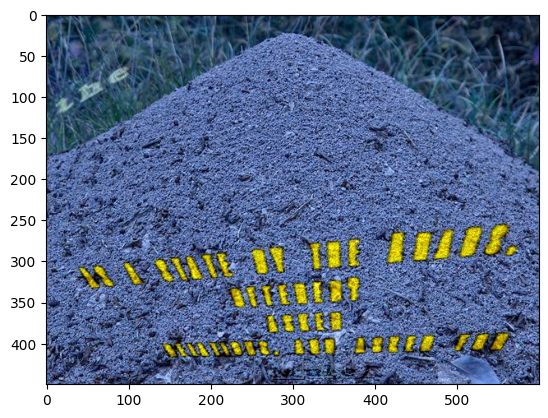

In [28]:
plt.imshow(image)

In [30]:
gr.shape

(450, 600, 3)

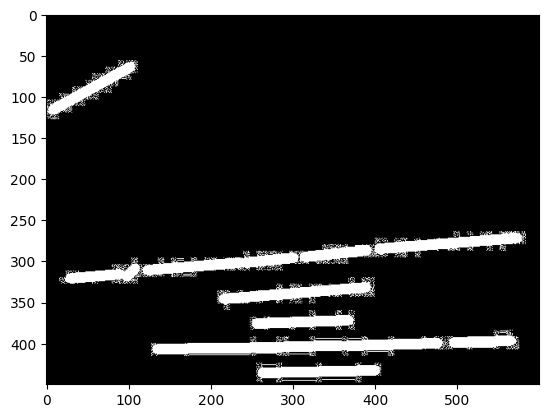

In [29]:
plt.imshow(gr,cmap="gray")

In [31]:
gr_resized = tcl_map_resized
gr_resized[gr_resized > 0] = 255

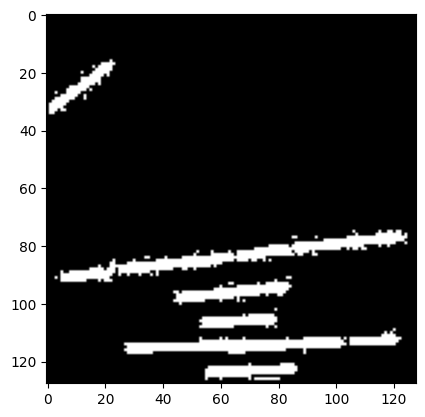

In [32]:
plt.imshow(gr_resized,cmap="gray")
plt.show()

In [36]:
x_train[0].shape

(512, 512, 3)